In [11]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from collections import Counter
import datetime
import sys
import logging
import math
from scipy.interpolate import InterpolatedUnivariateSpline
from scipy.integrate import simps

In [2]:
sensor_df = pd.DataFrame.from_csv("../../data/database/sensor_data.csv")
sensor_df = sensor_df[~((sensor_df.TagName == 'Start1') | (sensor_df.TagName == 'Start2'))]
Counter(sensor_df.TagName)

Counter({'Tag0': 352461,
         'Tag1': 272234,
         'Tag2': 377420,
         'Tag3': 398370,
         'Tag4': 428642,
         'Tag5': 435086,
         'Tag6': 358288,
         'Tag7': 315266,
         'Tag8': 431390,
         'Tag9': 381880})

In [40]:
sensor_df.head()

,TIMESTAMP,SENSORTYPE,VALUES1,VALUES2,VALUES3,VALUES4,VALUES5,TagName,tester_id,unix_timestamp
0,2018-01-08 15:48:06.708666666+08:00,9,-5.509204,-0.023635,8.112860,NaN,NaN,Tag1,0.0,1.515398e+09
1,2018-01-08 15:48:06.708666666+08:00,11,-0.237372,-0.164634,0.769517,-0.569556,0.0,Tag1,0.0,1.515398e+09
2,2018-01-08 15:48:06.708666666+08:00,3,106.633320,-1.170071,33.563435,NaN,NaN,Tag1,0.0,1.515398e+09
3,2018-01-08 15:48:06.708666666+08:00,1,-5.242072,-0.014362,7.683585,NaN,NaN,Tag1,0.0,1.515398e+09
4,2018-01-08 15:48:06.708666666+08:00,4,0.063921,0.074574,-0.015980,NaN,NaN,Tag1,0.0,1.515398e+09


In [39]:
sensor_df.to_csv("../../data/database/sensor_data.csv")

In [3]:
tester_df = pd.DataFrame.from_csv("../../data/database/tester_info.csv")

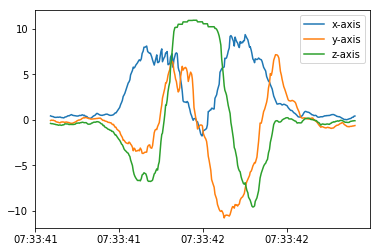

In [108]:
user0 = sensor_df[sensor_df.tester_id == 1]
user0_action_1 = user0[user0.TagName == 'Tag0']
# 1 2 3 4 9 10 11
user0_action_1_acc = user0_action_1[user0_action_1.SENSORTYPE == 10]
x, = plt.plot(pd.to_datetime(user0_action_1_acc.TIMESTAMP), user0_action_1_acc.VALUES1, label = 'x-axis')
y, = plt.plot(pd.to_datetime(user0_action_1_acc.TIMESTAMP), user0_action_1_acc.VALUES2, label = 'y-axis')
z, = plt.plot(pd.to_datetime(user0_action_1_acc.TIMESTAMP), user0_action_1_acc.VALUES3, label = 'z-axis')
# plt.title("Example Accelerometer Sensor Reading of Gesture 4")
plt.legend(handles=[x,y,z])
# plt.savefig('/Users/Ageha/Desktop/acc_gesture4.png')
plt.show()

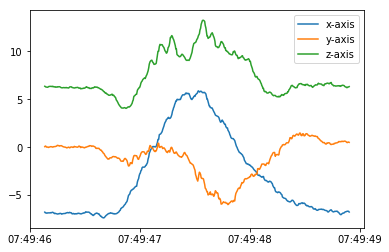

In [6]:
user0 = sensor_df[sensor_df.tester_id == 0]
user0_action_1 = user0[user0.TagName == 'Tag0']
# 1 2 3 4 9 10 11
user0_action_1_acc = user0_action_1[user0_action_1.SENSORTYPE == 1]
x, = plt.plot(pd.to_datetime(user0_action_1_acc.TIMESTAMP), user0_action_1_acc.VALUES1, label = 'x-axis')
y, = plt.plot(pd.to_datetime(user0_action_1_acc.TIMESTAMP), user0_action_1_acc.VALUES2, label = 'y-axis')
z, = plt.plot(pd.to_datetime(user0_action_1_acc.TIMESTAMP), user0_action_1_acc.VALUES3, label = 'z-axis')
# plt.title("Example Accelerometer Sensor Reading of Gesture 4")
plt.legend(handles=[x,y,z])
# plt.savefig('/Users/Ageha/Desktop/acc_gesture4.png')
plt.show()

In [12]:
def shrink_array(array,size):
    
    ratio = float(len(array)) / float(size+1)
    res = []
    for i in range(size):
        res.append(np.mean(array[math.floor(i*ratio):math.ceil((i+1.0)*ratio)], axis = 0))
    return np.array(res)

/Users/Ageha/anaconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/Ageha/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


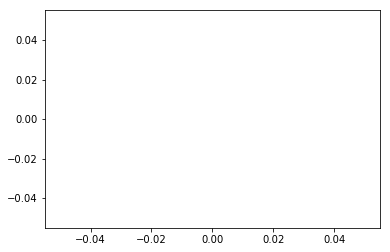

In [103]:
for i in range(10):


    # 1 2 3 4 9 10 11
    user0_action_1_acc = user0_action_1[user0_action_1.SENSORTYPE == 12]
    z, = plt.plot(list(range(50)), shrink_array(user0_action_1_acc.VALUES3.values, 50))
    # plt.title("Example Accelerometer Sensor Reading of Gesture 4")
# plt.legend(handles=[x,y,z])
# plt.savefig('/Users/Ageha/Desktop/acc_gesture4.png')
plt.show()

In [89]:
tester_df[tester_df.index == 11]

,Tester_Name,Tester_Age,Tester_Height,Tester_Gender,Tester_Weight,Tester_hand,start_time,end_time
11,zf,48,162,F,55,l,2018-01-04 22:05:08.263000+08:00,2018-01-04 22:10:42.858000+08:00


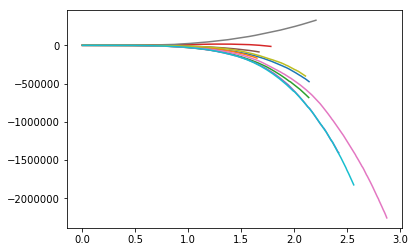

In [99]:
ds = []
alpha = 0.8
for ID in range(10):
    user0 = sensor_df[sensor_df.tester_id == ID]
    user0_action_1 = user0[user0.TagName == 'Tag1']
    user0_action_1_acc = user0_action_1[user0_action_1.SENSORTYPE == 1]
    t = user0_action_1_acc.unix_timestamp.values
    v = []
    d = []
    for i in range(len(t)):
        v.append(simps(0.8*user0_action_1_acc.VALUES2.values[:i+1]-0.2*9.81, dx=(t[i]-t[0])))
    for i in range(len(t)):
        d.append(simps(v[:i+1], dx=(t[i]-t[0])))

    plt.plot(t-min(t),d)
    ds.append(max(d))
plt.show()

In [86]:
plt.show()

[3008888.0556857008,
 3035478.4297743426,
 3060910.7377930675,
 3086539.2206093445,
 3112258.7653954085]

In [78]:
user0_action_1_acc.head()

,TIMESTAMP,SENSORTYPE,VALUES1,VALUES2,VALUES3,VALUES4,VALUES5,TagName,tester_id,unix_timestamp
450311,2018-01-04 22:09:31.982000+08:00,1,-1.469695,-2.589919,8.947427,NaN,NaN,Tag0,11.0,1.515075e+09
450316,2018-01-04 22:09:31.987000+08:00,1,-1.488844,-2.609068,8.937852,NaN,NaN,Tag0,11.0,1.515075e+09
450325,2018-01-04 22:09:31.992000+08:00,1,-1.507993,-2.599493,8.909128,NaN,NaN,Tag0,11.0,1.515075e+09
450330,2018-01-04 22:09:31.997000+08:00,1,-1.498419,-2.589919,8.880404,NaN,NaN,Tag0,11.0,1.515075e+09
450337,2018-01-04 22:09:32.002000+08:00,1,-1.498419,-2.589919,8.880404,NaN,NaN,Tag0,11.0,1.515075e+09


In [70]:
len(t)

634

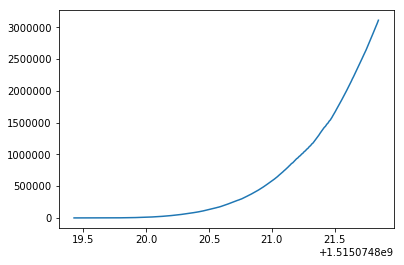

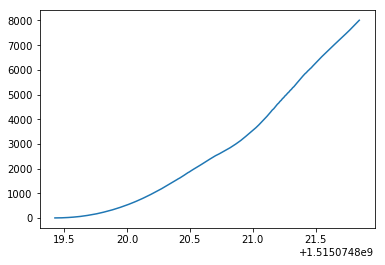

In [87]:
plt.plot(t,v)
plt.show()

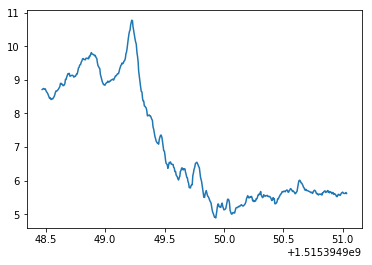

In [102]:
plt.plot(t,user0_action_1_acc.VALUES2.values+9.81)
plt.show()

In [36]:
t =  pd.to_datetime(sensor_df['TIMESTAMP']).values.astype('uint64') / 1e9


array([  1.51539769e+09,   1.51539769e+09,   1.51539769e+09,
         1.51539769e+09,   1.51539769e+09,   1.51539769e+09,
         1.51539769e+09,   1.51539769e+09,   1.51539769e+09,
         1.51539769e+09])

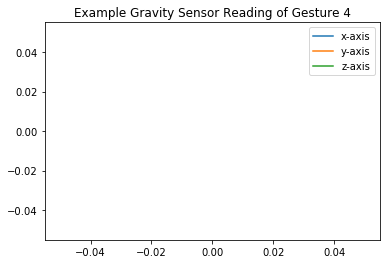

In [20]:
user0 = sensor_df[sensor_df.tester_id == 6]
user0_action_1 = user0[user0.TagName == 'Tag2']
user0_action_1_acc = user0_action_1[user0_action_1.SENSORTYPE == 26]
x, = plt.plot(pd.to_datetime(user0_action_1_acc.TIMESTAMP), user0_action_1_acc.VALUES1, label = 'x-axis')
y, = plt.plot(pd.to_datetime(user0_action_1_acc.TIMESTAMP), user0_action_1_acc.VALUES2, label = 'y-axis')
z, = plt.plot(pd.to_datetime(user0_action_1_acc.TIMESTAMP), user0_action_1_acc.VALUES3, label = 'z-axis')
plt.title("Example Gravity Sensor Reading of Gesture 4")
plt.legend(handles=[x,y,z])
plt.savefig('/Users/Ageha/Desktop/gravity_gesture4.png')
plt.show()
plt.show()



In [22]:
Counter(sensor_df[sensor_df.SENSORTYPE == 26].TagName.values)

Counter({'Start1': 25,
         'Start2': 10,
         'Tag0': 33,
         'Tag1': 1,
         'Tag2': 17,
         'Tag3': 15,
         'Tag4': 42,
         'Tag5': 27,
         'Tag6': 33,
         'Tag7': 10,
         'Tag8': 45,
         'Tag9': 33})

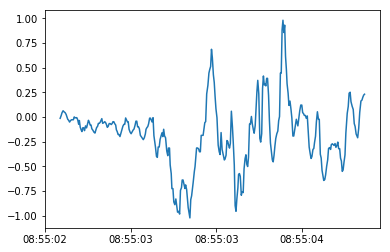

In [111]:
user0 = sensor_df[sensor_df.tester_id == 20]
user0_action_1 = user0[user0.TagName == 'Tag1 ']
# [1, 2, 3, 4, 11, 26, 9, 10]
user0_action_1_acc = user0_action_1[user0_action_1.SENSORTYPE == 10]
# plt.plot(pd.to_datetime(user0_action_1_acc.TIMESTAMP), user0_action_1_acc.VALUES1)
plt.plot(pd.to_datetime(user0_action_1_acc.TIMESTAMP), user0_action_1_acc.VALUES2)
# plt.plot(pd.to_datetime(user0_action_1_acc.TIMESTAMP), user0_action_1_acc.VALUES3)
plt.show()